# EDA on Second Set of Borehole Profiles

In [1]:
from stratigraphy import DATAPATH
import json

In [2]:
input_directory = DATAPATH / "data_v2"
ground_truth_path = input_directory / "geoquat_ground_truth.json"
predictions_path = input_directory / "extract" / "predictions.json"

## Check if ground truth is present for all files

In [3]:
with open(ground_truth_path) as in_file:
        ground_truth = json.load(in_file)

In [4]:
# count all pdf files in input directory
pdf_files = list(input_directory.glob("*.pdf"))
n_pdf_files = len(pdf_files)
print(f"There are {n_pdf_files} pdf files in the input directory.")

There are 1658 pdf files in the input directory.


In [5]:
print(f"There is ground_truth data for {len(ground_truth.keys())} pdf files. There are no duplicated keys.")

There is ground_truth data for 2137 pdf files. There are no duplicated keys.


In [6]:
# Check the overlap between ground truth and available pdfs
ground_truth_keys = set(ground_truth.keys())
pdf_keys = set([str(pdf_path).split('/')[-1] for pdf_path in pdf_files])
intersection = ground_truth_keys.intersection(pdf_keys)
print(f"There are {len(intersection)} pdf files with ground truth data.")

There are 1658 pdf files with ground truth data.


We know that there is ground truth data for each pdf. More, there is also ground truth for pdfs that we don't have.

## Check language distribution of the borehole profiles

In [7]:
from langdetect import detect
import fitz
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

In [8]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Language detection failed"

In [9]:
def extract_text_from_pdf(file_path):
    doc = fitz.open(file_path)
    text = ""
    for page in doc:
        text += page.get_text()
    text = text.replace("\n", " ")

    # remove all numbers and special characters from text
    return ''.join(e for e in text if (e.isalnum() or e.isspace()) and not e.isdigit())

In [10]:
# check if all documents have text
files_without_text = []
for pdf_file in tqdm(pdf_files):
    text = extract_text_from_pdf(pdf_file)
    if not text or len(text) < 10:
        files_without_text.append(pdf_file)
print(f"There are {len(files_without_text)} pdf files without text. This is {len(files_without_text) / n_pdf_files * 100:.2f}% of all pdf files.")

  0%|                                                                                                                                                                                                                                      | 0/1658 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1658/1658 [00:05<00:00, 314.35it/s]

There are 57 pdf files without text. This is 3.44% of all pdf files.


In [34]:
# check the distribution of languages in the pdf files
languages = {}
files_per_language = defaultdict(list)
for pdf_file in tqdm(pdf_files):
    if pdf_file in files_without_text:  # if theres no text we can't detect the language
        continue
    text = extract_text_from_pdf(pdf_file)
    language = detect_language(text)
    if language in languages:
        languages[language] += 1
    else:
        languages[language] = 1
    files_per_language[language].append(pdf_file)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1658/1658 [00:10<00:00, 153.89it/s]


In [35]:
languages

{'de': 1302, 'fr': 276, 'en': 21, 'pt': 1, 'es': 1}

In [13]:
print(f"{languages['de'] / (n_pdf_files - len(files_without_text)) * 100:.2f}% of all pdf files are in German.")
print(f"{languages['fr'] / (n_pdf_files - len(files_without_text)) * 100:.2f}% of all pdf files are in French.")
print(f"{languages['en'] / (n_pdf_files - len(files_without_text)) * 100:.2f}% of all pdf files are in English.")
# Note: Later on we will notice that most English documents are actually in German. We can conclude that we have German and French documents.

81.26% of all pdf files are in German.
17.24% of all pdf files are in French.
1.31% of all pdf files are in English.


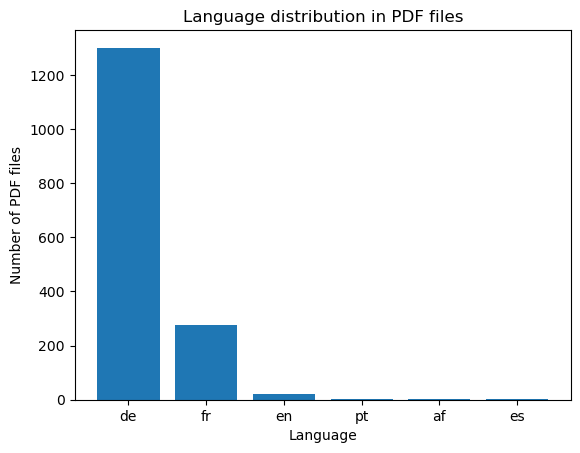

In [14]:
# plot language distribution
plt.bar(languages.keys(), languages.values())
plt.xlabel("Language")
plt.ylabel("Number of PDF files")
plt.title("Language distribution in PDF files")
plt.show()

### The language detection is sometimes wrong - Examples
In some cases the wrong language is detected. It seems this is due to the text recognition, and not acutally a fault of the language detection.
Sometimes text is very badly recognized, and sometimes there is text in the pdf's that is not supposed to be there.

In [15]:
# Some examples have strange text in them. Example of A8570.pdf. Document is in German, but there seems to be a lot of
# English text in it. The actual document does not contain this English text
text = extract_text_from_pdf(files_per_language['en'][-2]).replace("\n", " ")
''.join(e for e in text if (e.isalnum() or e.isspace()) and not e.isdigit())

'Geobechnisches Institute RG Rotationsbohrung RB P  Ben Gortenstrouse a Selection on  M  RtNe  Objett Geverbezentrum Melliger Chutzenstrasse Hone in in  M  Stung tohn AS Koordination      Bohrneight Mr Moser  He Florl Deturn    LN Tete Profit Georechrische Bezeichnung Geal Benerlungen    silger Kare  Send with  I King  IN  and Sand AT  partner snipsitiger   Send AT againstre   in braungrau  Kee  Bent AS  a may sends new ship offer Tax  Send Mino  Grobanc  veric Kor and  sitigen Lines Fair Grobeard as site signature   when order wardland leader   nitworig Feinward   pebtrace  an   onlession    and since Fairward brown  graver     Persend probrain audit differe Painsant  at  Personal one press leught Waterlapering   and Send  to  Assistic   grauget braun  leaft as  Fairmand terling Math sitigar Sand   Mississed  teache sition Sand  work Kim achweek  I Keep nb fined sites    transport Kar and Sand at sitip  Staine  SPT be    be           an due de      Bellage  a b c SPT  d d '

In [16]:
# Example A8504 --> almost no Text recognized. The document is actually in German
text = extract_text_from_pdf(files_per_language['en'][-5]).replace("\n", " ")
''.join(e for e in text if (e.isalnum() or e.isspace()) and not e.isdigit())

'Rb Didnt auffullery Tart unit Sandand filtsinlogegr     land filt unit ind Sand u weing this stell waise samber fand fitty fand unit kies    silt unit Sand and weing kies   '

In [17]:
# Example A8530 --> OCR errorfull. The document is actually in German
text = extract_text_from_pdf(files_per_language['en'][-7]).replace("\n", " ")
''.join(e for e in text if (e.isalnum() or e.isspace()) and not e.isdigit())

'which getter send  Author  V BI '

## Check Content of Ground Truth

In [18]:
# get 10 random keys from ground truth
import random
random_keys = random.sample(list(intersection), 10)

In [19]:
# fix the keys
random_keys = ['A11145.pdf',
 'A11132.pdf',
 'A11251.pdf',
 'B598.pdf',
 'A11440.pdf',
 'A11329.pdf',
 '12326.pdf',
 '8367.pdf',
 'A7171.pdf',
 'A8291.pdf']

In [20]:
number_wrong = 0
fp = 0
fn = 0
tp = 0
total_number = 0
total_number += len(ground_truth[random_keys[0]]["layers"])
tp += len(ground_truth[random_keys[0]]["layers"])
ground_truth[random_keys[0]]["layers"]  # all correct


[{'material_description': 'Humus, dunkelbraun',
  'depth_interval': {'start': 0.0, 'end': 0.5}},
 {'material_description': 'Silt, Sand + Grobkies, braun',
  'depth_interval': {'start': 0.5, 'end': 1.0}},
 {'material_description': 'siltiger Sand, braun',
  'depth_interval': {'start': 1.0, 'end': 2.1}},
 {'material_description': 'sandiger Silt, organ. Verunreinigt, graugelb',
  'depth_interval': {'start': 2.1, 'end': 2.3}},
 {'material_description': 'Torf + Silt, schwarz bis grau',
  'depth_interval': {'start': 2.3, 'end': 2.8}},
 {'material_description': 'Silt mit Feinsand, graugelb',
  'depth_interval': {'start': 2.8, 'end': 3.2}},
 {'material_description': 'Siltiger Sand, grau bis dunkelgrau',
  'depth_interval': {'start': 3.2, 'end': 3.9}},
 {'material_description': 'siltiger Sand mit Kies, bräunlich-grau',
  'depth_interval': {'start': 3.9, 'end': 4.35}},
 {'material_description': 'siltiger Kiessand, rostrot',
  'depth_interval': {'start': 4.35, 'end': 5.1}},
 {'material_description

In [21]:
fn += 1
tp += len(ground_truth[random_keys[1]]["layers"])
total_number += len(ground_truth[random_keys[1]]["layers"]) + 1
ground_truth[random_keys[1]]["layers"]  # first layer is missing

[{'material_description': 'toniger Silt mit wenig Feinsand, bräunlichgrau',
  'depth_interval': {'start': 0.0, 'end': 2.75}},
 {'material_description': 'leicht toniger Silt ab 5,80 bis 15,0 toniger Silt, dunkelgrau',
  'depth_interval': {'start': 2.75, 'end': 15.0}}]

In [22]:
tp += len(ground_truth[random_keys[2]]["layers"])
total_number += len(ground_truth[random_keys[2]]["layers"])
ground_truth[random_keys[2]]["layers"]  # all correct

[{'material_description': 'Humus, schwarz',
  'depth_interval': {'start': 0.0, 'end': 0.5}},
 {'material_description': 'Silt mit viel Sand und wenig Kies, sowie Ziegelresten etc. Auffüllung, braun',
  'depth_interval': {'start': 0.5, 'end': 1.7}},
 {'material_description': 'leicht siltiger Kies mit reichlich Sand und mit Steinen bis ¿15cm, braungrau',
  'depth_interval': {'start': 1.7, 'end': 4.5}},
 {'material_description': 'toniger Silt mit wenig kleinen Steinen, braun grau',
  'depth_interval': {'start': 4.5, 'end': 6.0}},
 {'material_description': 'toniger Silt mit sehr wenig kleinen Steinen, blau grau',
  'depth_interval': {'start': 6.0, 'end': 15.3}}]

In [23]:
fp += 2
total_number += len(ground_truth[random_keys[3]]["layers"])
tp += total_number - 2
ground_truth[random_keys[3]]["layers"]  # two layers deviate in wording

[{'material_description': 'Humus',
  'depth_interval': {'start': 0.0, 'end': 0.6}},
 {'material_description': 'Brauner, siltiger Sand, erdig',
  'depth_interval': {'start': 0.6, 'end': 1.7}},
 {'material_description': 'Sand, Kies, leicht erdig',
  'depth_interval': {'start': 1.7, 'end': 2.0}},
 {'material_description': 'Stark sandiger Kies, mit einz. Steinen',
  'depth_interval': {'start': 2.0, 'end': 4.0}},
 {'material_description': 'Kies, einz. Steine mit wechselned wenig bis reichlich Sand',
  'depth_interval': {'start': 4.0, 'end': 7.5}},
 {'material_description': 'Schuttmaterial? Kies und Steine, sandig, z.T. kantiges Material, erdig-braun',
  'depth_interval': {'start': 7.5, 'end': 8.5}},
 {'material_description': 'Mergelkalk, grau, gebankt, Mergelzwischenlagen bis wenige cm. Stärke',
  'depth_interval': {'start': 8.5, 'end': 13.6}}]

In [24]:
tp += len(ground_truth[random_keys[4]]["layers"])
total_number += len(ground_truth[random_keys[4]]["layers"])
ground_truth[random_keys[4]]["layers"]  # wording slightly different (diameter symbol exchanged with "bis")
# we consider this as correct though

[{'material_description': 'Humus mit Steinen, braun',
  'depth_interval': {'start': 0.0, 'end': 0.4}},
 {'material_description': 'Stark siltiger Kies mit viel Sand und Wurzeln humos wenig Steinen bis 20cm, braun',
  'depth_interval': {'start': 0.4, 'end': 1.8}},
 {'material_description': 'leicht siltiger Kies ca. 20-30% grosse Steine bis 20cm eher locker, grau',
  'depth_interval': {'start': 1.8, 'end': 2.4}},
 {'material_description': 'stark siltiger Sand mit viel Kies, z.T. leicht tonig, festgelagert, grau-gelblich',
  'depth_interval': {'start': 2.4, 'end': 3.5}},
 {'material_description': 'stark toniger Silt, hartplastisch, gelb',
  'depth_interval': {'start': 3.5, 'end': 3.65}},
 {'material_description': 'tonig siltiger Kies mit viel Sand, wenig grosse Steine bis 15cm, festgelagert, grau',
  'depth_interval': {'start': 3.65, 'end': 5.0}},
 {'material_description': 'Wechsellagerungen von siltigen Fein-Mittelsand',
  'depth_interval': {'start': 5.0, 'end': 5.8}}]

In [25]:
tp += len(ground_truth[random_keys[5]]["layers"])
total_number += len(ground_truth[random_keys[5]]["layers"])
ground_truth[random_keys[5]]["layers"]  # all correct

[{'material_description': 'Humus',
  'depth_interval': {'start': 0.0, 'end': 0.1}},
 {'material_description': 'brauner, stark siltiger Kies mit Sand',
  'depth_interval': {'start': 0.1, 'end': 0.5}},
 {'material_description': 'grauer, leicht siltiger Kies mit reichlich bis viel Sand',
  'depth_interval': {'start': 0.5, 'end': 3.45}},
 {'material_description': 'beiger, stark siltiger Kies mit Sand, wasserführend',
  'depth_interval': {'start': 3.45, 'end': 3.7}},
 {'material_description': 'beiger, toniger Silt mit einzelnen kleinen Steinen, plastisch',
  'depth_interval': {'start': 3.7, 'end': 4.7}},
 {'material_description': 'angewitterter Sandstein bei 5m Wasserführend',
  'depth_interval': {'start': 4.7, 'end': 5.4}},
 {'material_description': 'kompakter Sandstein',
  'depth_interval': {'start': 5.4, 'end': 6.0}}]

In [26]:
fp += 1
tp += len(ground_truth[random_keys[6]]["layers"]) - 1
total_number += len(ground_truth[random_keys[6]]["layers"])
ground_truth[random_keys[6]]["layers"]  # fourth layer deviates

[{'material_description': 'Enrobé (e= 10 cm) sur grave de fondation assez limoneuse.',
  'depth_interval': {'start': 0.0, 'end': 0.8}},
 {'material_description': 'Limon sablo-argileux, gris-beige, ferme, à cailloux plus ou moins abondants et morceaux de briques.',
  'depth_interval': {'start': 0.8, 'end': 1.5}},
 {'material_description': 'Gravier à éléments roulés hétérométriques (dm. max. obs. 10 cm) dans matrice sableuse plus ou moins limoneuse, gris-beige, pulvérulente à assez cohérente dans les zones les plus limoneuses. Assise compacte à très compacte, perméable à semi-perméable.',
  'depth_interval': {'start': 1.5, 'end': 3.4}},
 {'material_description': "Gravier à éléments roulés hétérométriques (dm. max. obs. 10 cm) dans matrice très limoneuse semi-cohérente et peu perméable. Assise compacte à très compacte, perméable à semi-perméable.\nPetit venue d'eau vers 4.0m (11-12.2.2004).",
  'depth_interval': {'start': 3.4, 'end': 4.3}},
 {'material_description': 'Limon argileux, gris,

In [27]:
fp += 5
tp += len(ground_truth[random_keys[7]]["layers"]) - 5
total_number += len(ground_truth[random_keys[7]]["layers"])
ground_truth[random_keys[7]]["layers"]  # sixth layer has an additional sentence in ground truth
# same for 6.7 - 7.2.
# Same for 9.1 - 9.6
# 11.9 - 14.1 text taken from two different areas on the pdf. text is joint together not in sequential order
# 14.1 - 15.0 different wording


[{'material_description': 'Bitume.',
  'depth_interval': {'start': 0.0, 'end': 0.1}},
 {'material_description': "Grave d'infrastructure.",
  'depth_interval': {'start': 0.1, 'end': 0.5}},
 {'material_description': 'Limon argileux à poussées finement sableuses, brun-jaunâtre (oxydation), texture  grumeleuse à délits pelliculaires de sable fin, ferme, assez plastique.',
  'depth_interval': {'start': 0.5, 'end': 2.3}},
 {'material_description': "Argile peu limoneuse, brun verdâtre à rubanage limonitique ocre, mal stratifiée à massive, nombreux petits coquillages d'eau douce et esquilles charbonneuses. Assise ferme à tendre, plastique, imperméable.",
  'depth_interval': {'start': 2.3, 'end': 2.8}},
 {'material_description': 'Argile peu limoneuse, grise rubanée de noir (traces organiques diffuses), avec débris de mollusques et esquilles de charbon, tendre, très plastique.',
  'depth_interval': {'start': 2.8, 'end': 3.9}},
 {'material_description': 'Limon sablo-argileux gris-sombre, avec nom

In [28]:
fp += 4
tp += len(ground_truth[random_keys[8]]["layers"]) - 4
total_number += len(ground_truth[random_keys[8]]["layers"])
ground_truth[random_keys[8]]["layers"]
# one layer in the pdf is divided into multiple layers in the ground truth. Drawing shows that the layer might actually be divided.
# 9.9 - 10.0 layer present in ground truth but not in pdf
# 10.0 - 13
# 13.0 - 13.5
# 13.5 - 14.6


[{'material_description': 'Humus',
  'depth_interval': {'start': 0.0, 'end': 0.25}},
 {'material_description': 'leicht siltiger, sandiger Kies (rund), grau bis braun',
  'depth_interval': {'start': 0.25, 'end': 1.3}},
 {'material_description': 'siltiger Fein- bis Mittelsand mit reichlich Kies, braungrau, bis grau',
  'depth_interval': {'start': 1.3, 'end': 2.8}},
 {'material_description': 'zersetzter Torf, schwarz',
  'depth_interval': {'start': 2.8, 'end': 3.3}},
 {'material_description': 'Silt, sehr weich, organisch (mit Torflagen), dunkelgrau',
  'depth_interval': {'start': 3.3, 'end': 3.85}},
 {'material_description': 'ziemlich zersetzter Torf, dunkelbraun',
  'depth_interval': {'start': 3.85, 'end': 4.45}},
 {'material_description': 'leicht toniger Silt, weich, geschichtet, grau, wenig organische Beimengungen (Holzresten)',
  'depth_interval': {'start': 4.45, 'end': 5.2}},
 {'material_description': 'sandiger Silt mit wenig bis reichlich Kies, zum Teil kantig, grau (bis 5.7 m aufge

In [29]:
fn += 1
fp += 6
tp += len(ground_truth[random_keys[9]]["layers"]) - 7
total_number += len(ground_truth[random_keys[9]]["layers"])
ground_truth[random_keys[9]]["layers"]
# layer 1: words in wrong order
# layer 4: words in wrong order
# layer 5: words in wrong order
# layer 6: words in wrong order, additional information in ground truth that is not in material description
# layer 7: slightly different information
# layer 8: additional information in ground truth not present in material description
# layer 9 - 14: missing in ground truth

[{'material_description': 'sandiger (MS - VCS) Kies (Durchmesser 2 - 30 mm) grau-braun bis bunt',
  'depth_interval': {'start': 0.0, 'end': 12.0}},
 {'material_description': 'sauberer Sand (FS-CS) braun-grau',
  'depth_interval': {'start': 12.0, 'end': 18.0}},
 {'material_description': 'sandiger (FS-VCS) Kies (Durchmesser 2 - 15 mm) bunt',
  'depth_interval': {'start': 18.0, 'end': 44.0}},
 {'material_description': 'sehr sandiger (FS - CS) Kies (Durchmesser 2 - 20 mm), braun',
  'depth_interval': {'start': 44.0, 'end': 46.0}},
 {'material_description': 'leicht kiesiger (Durchmesser 2 - 5 mm) Sand (FS - VCS)',
  'depth_interval': {'start': 46.0, 'end': 48.0}},
 {'material_description': 'leicht sandiger (MS - CS) Kies (Durchmesser 2 - 20 mm) bunt mit relativ starken Wasseraustritten',
  'depth_interval': {'start': 48.0, 'end': 56.0}},
 {'material_description': 'sauberer Sand (FS - VCS) braun',
  'depth_interval': {'start': 56.0, 'end': 64.0}},
 {'material_description': 'bunte Mergel grau

In [30]:
print(f"The total number of layers is {total_number}. The precision is {tp / (tp + fp):.2f} and the recall is {tp / (tp + fn):.2f}. F1 is {2 * tp / (2 * tp + fp + fn):.2f}.")

The total number of layers is 87. The precision is 0.83 and the recall is 0.98. F1 is 0.90.


## Generation of Train-, Evaluation- and Testset

We stratify by:
- Language
- Number of layers in the document

In [40]:
metadata = {}
for pdf_file in tqdm(pdf_files):
    if pdf_file in files_without_text:  # if theres no text we can't detect the language
        continue
    text = extract_text_from_pdf(pdf_file)
    language = detect_language(text)
    if language not in ['de', 'fr']:
        language = 'de'
    metadata[pdf_file.name] = {"language": language, "number_layers": len(ground_truth[pdf_file.name]["layers"])}

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1658/1658 [00:11<00:00, 149.93it/s]


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [89]:
X = pd.DataFrame.from_dict(metadata, orient='index')
bins = np.linspace(0, 50, 6)
bins = list(bins)
bins.append(5000)
X["number_layers_binned"] = pd.cut(X["number_layers"], bins=bins)

In [90]:
X.groupby("number_layers_binned").count()

/var/folders/vm/xm795ypj2sdc0fbgn1mkj2nr0000gp/T/ipykernel_70034/608337562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X.groupby("number_layers_binned").count()


,language,number_layers
number_layers_binned,,
"(0.0, 10.0]",866,866
"(10.0, 20.0]",579,579
"(20.0, 30.0]",109,109
"(30.0, 40.0]",29,29
"(40.0, 50.0]",10,10
"(50.0, 5000.0]",8,8


In [101]:
train_size = 0.7
test_size = 0.15
eval_size = 0.15

In [102]:
_X, X_test= train_test_split(X, test_size=test_size, random_state=42, stratify=X[["language", "number_layers_binned"]])  # it's not straight forward to stratify by number_of_layers as it's continuous.
X_train, X_val = train_test_split(_X, test_size=eval_size/(1-test_size), random_state=42, stratify=_X[["language", "number_layers_binned"]])

In [103]:
len(X_train), len(X_val), len(X_test)

(1119, 241, 241)

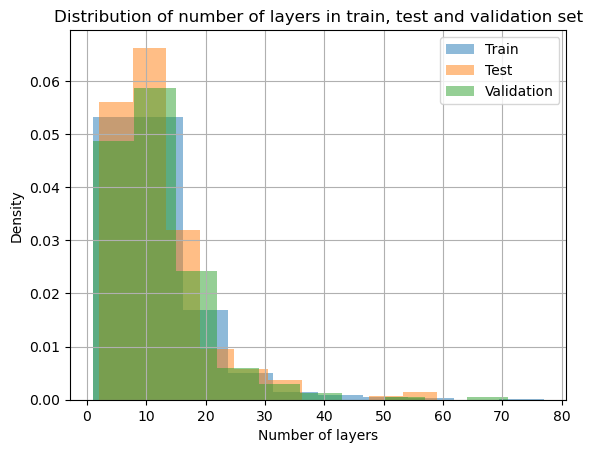

In [113]:
X_train.number_layers.hist(density=True, alpha=0.5, label="Train")
X_test.number_layers.hist(density=True, alpha=0.5, label="Test")
X_val.number_layers.hist(density=True, alpha=0.5, label="Validation")
plt.xlabel("Number of layers")
plt.ylabel("Density")
plt.title("Distribution of number of layers in train, test and validation set")
plt.legend()
plt.show()

Text(0.5, 0, 'Language')

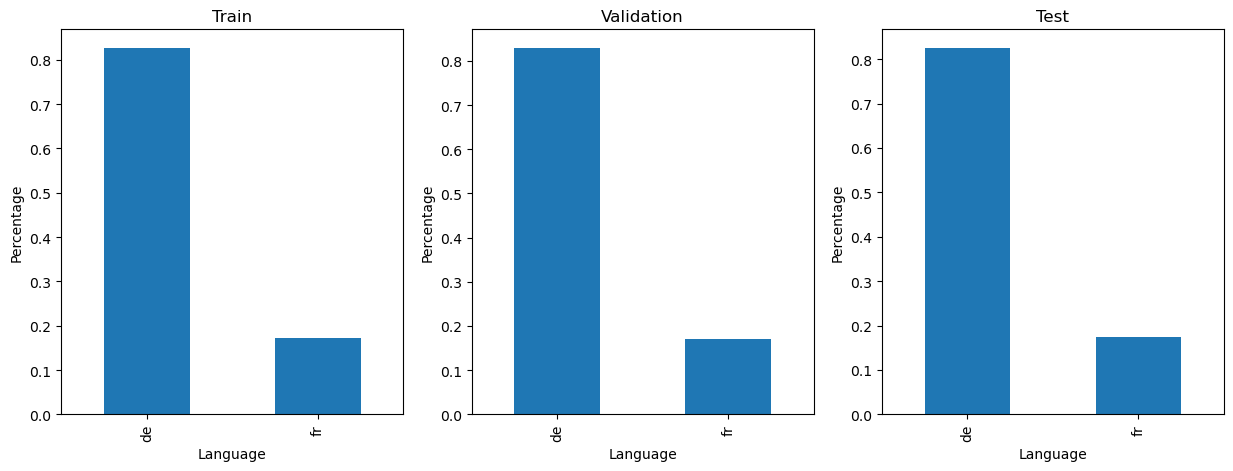

In [121]:
# create three subplots with the language distribution for train, test and validation set
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
X_train.language.value_counts(normalize=True).plot(kind='bar', ax=axs[0])
X_val.language.value_counts(normalize=True).plot(kind='bar', ax=axs[1])
X_test.language.value_counts(normalize=True).plot(kind='bar', ax=axs[2])
axs[0].set_title("Train")
axs[1].set_title("Validation")
axs[2].set_title("Test")
for ax in axs:
    ax.set_ylabel("Percentage")
    ax.set_xlabel("Language")
plt.ylabel("Percentage")
plt.xlabel("Language")